# **Exercise 04: regression models**

Import necessary *Python* packages:

In [1]:
import sys

import matplotlib.pyplot as plt

Add path to own modules:

In [2]:
sys.path.append("../../src", )

Import necessary entities:

In [3]:
from seaborn import scatterplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas import (
    Series,
    DataFrame,
    read_csv,
)

Import own necessary entities:

In [4]:
from utils import print_regression_model_cross_validation

Create a dictionary for `read_csv()` method calling:

In [5]:
read_csv_params: dict[str, str] = {
    "file": "checker_regression.csv",
    "file_path": "../../data/datasets/",
}

Read the file `checker_regression.csv` to a *Pandas* dataframe:

In [6]:
df: DataFrame = read_csv(
    read_csv_params["file_path"] + read_csv_params["file"],
).groupby(
    "uid",
).first().fillna(
    0,
)

Check `df` *Pandas* dataframe:

In [7]:
df.head()

,num_commits,pageviews,AVG(diff)
uid,,,
user_1,62,28.0,0.0
user_10,20,89.0,0.0
user_11,7,0.0,-2.0
user_12,86,0.0,-89.0
user_13,52,0.0,-48.5


Prepare features and target variables:

In [8]:
X: DataFrame = df.drop(
    columns=["AVG(diff)", ],
)
y: Series = df["AVG(diff)"]

Check `X` and `y` variables:

In [9]:
X.head()

,num_commits,pageviews
uid,,
user_1,62,28.0
user_10,20,89.0
user_11,7,0.0
user_12,86,0.0
user_13,52,0.0


In [10]:
y.head()

uid
user_1      0.0
user_10     0.0
user_11    -2.0
user_12   -89.0
user_13   -48.5
Name: AVG(diff), dtype: float64

## Make a split of dataset on train and test:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=21,
)

Check `X_train`, `X_test`, `y_train`, `y_test` variables:

In [12]:
X_train.head()

,num_commits,pageviews
uid,,
user_3,18,317.0
user_28,60,149.0
user_30,34,3.0
user_4,40,0.0
user_1,62,28.0


In [13]:
X_test.head()

,num_commits,pageviews
uid,,
user_26,36,0.0
user_29,51,0.0
user_10,20,89.0
user_2,46,0.0
user_14,61,143.0


In [14]:
y_train.head()

uid
user_3       0.0
user_28      0.0
user_30      0.0
user_4    -175.6
user_1       0.0
Name: AVG(diff), dtype: float64

In [15]:
y_test.head()

uid
user_26    -52.333333
user_29   -157.400000
user_10      0.000000
user_2    -137.200000
user_14      0.000000
Name: AVG(diff), dtype: float64

Create a model of *linear regression*:

In [16]:
lin_reg_model: LinearRegression = LinearRegression(fit_intercept=False, )

Print *cross validation* for *linear regression* model:

In [17]:
print_regression_model_cross_validation(
    X=X,
    y=y,
    reg_model=lin_reg_model,
)

train RMSE - 72.77 | test RMSE - 66.001
train RMSE - 73.572 | test RMSE - 56.94
train RMSE - 73.522 | test RMSE - 90.186
train RMSE - 70.196 | test RMSE - 85.932
train RMSE - 70.546 | test RMSE - 84.885
train RMSE - 69.828 | test RMSE - 89.034
train RMSE - 70.874 | test RMSE - 93.485
train RMSE - 75.398 | test RMSE - 28.364
train RMSE - 66.276 | test RMSE - 110.268
train RMSE - 73.046 | test RMSE - 55.395
Average RMSE on regression model cross validation is 73.826


Create a model of *decision tree*:

In [18]:
tree_model: DecisionTreeRegressor = DecisionTreeRegressor(
    random_state=21,
    max_depth=20,
)

Print *cross validation* for *decision tree* model:

In [19]:
print_regression_model_cross_validation(
    X=X,
    y=y,
    reg_model=tree_model,
)

train RMSE - 0.0 | test RMSE - 117.177
train RMSE - 0.0 | test RMSE - 79.533
train RMSE - 0.0 | test RMSE - 0.0
train RMSE - 0.0 | test RMSE - 78.987
train RMSE - 0.0 | test RMSE - 101.367
train RMSE - 0.0 | test RMSE - 35.388
train RMSE - 0.0 | test RMSE - 0.0
train RMSE - 0.0 | test RMSE - 69.81
train RMSE - 0.0 | test RMSE - 117.529
train RMSE - 0.0 | test RMSE - 40.588
Average RMSE on regression model cross validation is 32.019


Create a model of *random forest*:

In [20]:
tree_forest_model: RandomForestRegressor = RandomForestRegressor(
    max_depth=25,
    random_state=21,
    n_estimators=200,
)

Print *cross validation* for *random forest* model:

In [21]:
print_regression_model_cross_validation(
    X=X,
    y=y,
    reg_model=tree_forest_model,
)

train RMSE - 21.351 | test RMSE - 94.282
train RMSE - 22.4 | test RMSE - 79.523
train RMSE - 26.843 | test RMSE - 22.189
train RMSE - 24.411 | test RMSE - 55.74
train RMSE - 24.106 | test RMSE - 78.34
train RMSE - 24.136 | test RMSE - 55.767
train RMSE - 26.034 | test RMSE - 5.207
train RMSE - 23.636 | test RMSE - 58.708
train RMSE - 22.085 | test RMSE - 90.77
train RMSE - 26.059 | test RMSE - 30.487
Average RMSE on regression model cross validation is 40.604


Create `models_predictions` *Pandas* dataframe with models predictions:

In [22]:
models_predictions: DataFrame = DataFrame(
    {
        "AVG (diff)": y_test,
        "decision_tree": tree_model.predict(X_test, ),
        "linear_regression": lin_reg_model.predict(X_test, ),
        "random_forest": tree_forest_model.predict(X_test, ),
    },
)

## Draw a plot for each of the models where the `x` - an average difference, the `y` - a model predictions:

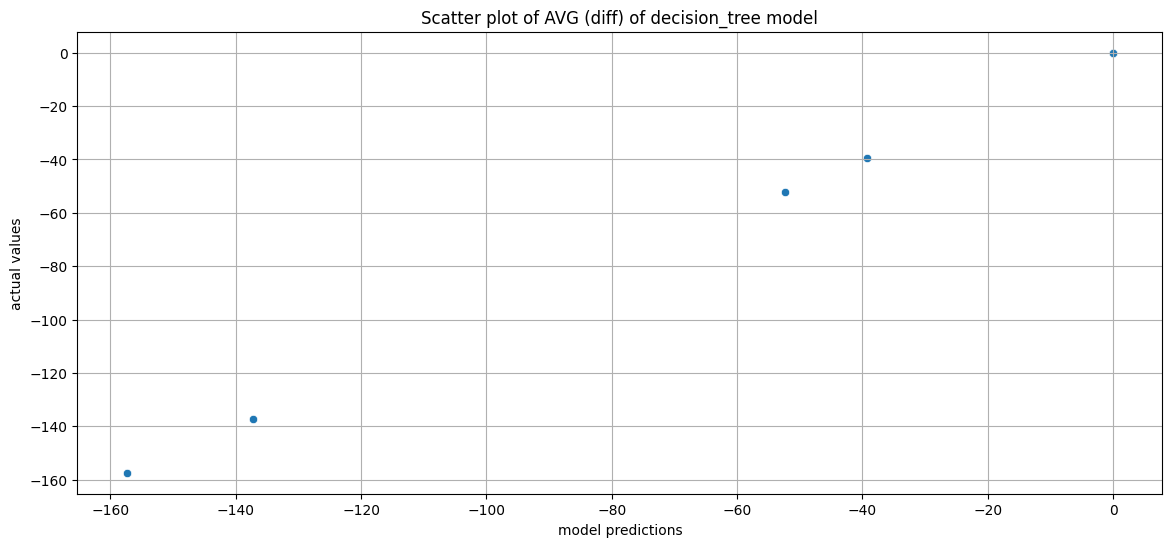

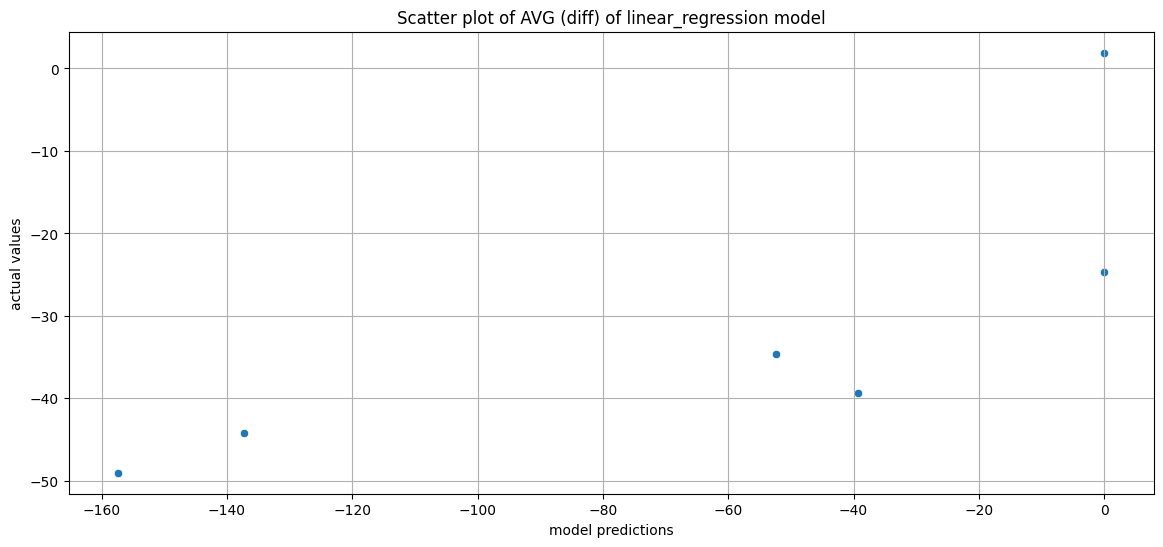

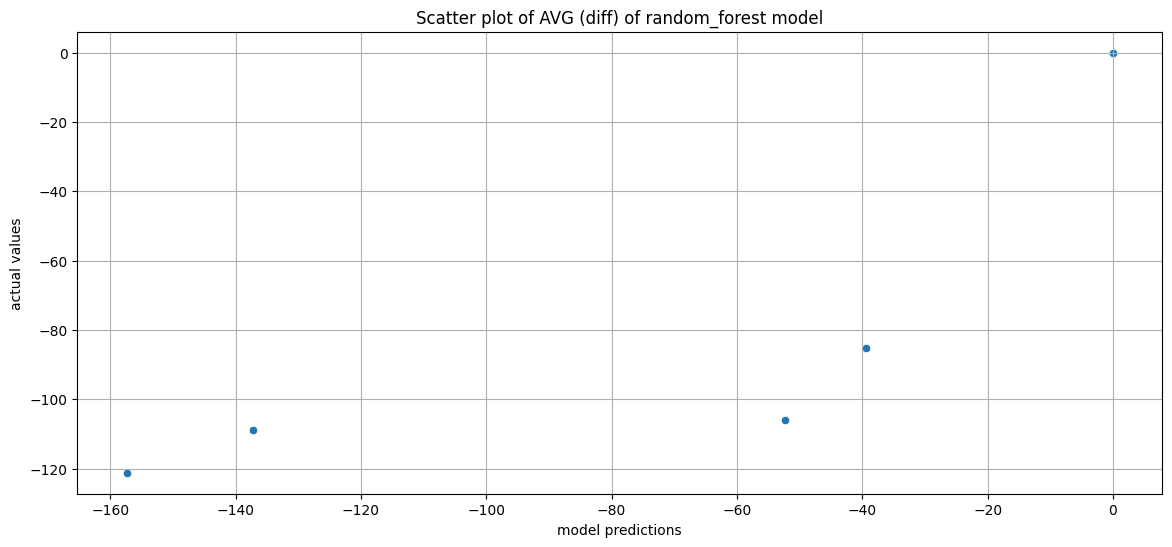

In [23]:
for model_name in list(models_predictions.columns, )[1 :]:
    plt.figure(figsize=(14, 6, ), )
    scatterplot(
        data=models_predictions,
        x="AVG (diff)",
        y=model_name,
    )
    plt.title(f"Scatter plot of AVG (diff) of {model_name} model", )
    plt.xlabel("model predictions", )
    plt.ylabel("actual values", )
    plt.grid()
    plt.show()

## `How would plot look like in the ideal case?`

Answer: a diagonal line.